#Chapter 3 - First steps in sklearn

In this chapter, we make our first steps using `scikit-learn` (commonly abbreviated to `sklearn`), a marvellous Python library for Machine Learning, which is actively being developed by a large and enthousiastic community. The excellent documentation of the package etc. can be found [here](http://scikit-learn.org/stable/). The library that comes with `sklearn`is excellent for supervised as well as unsupervised procedures. In this chapter, we will have a look at amongst others Principal Components Analysis, as a representative example of unsupervised learning. In the next chapter, we will focus on how sklearn can be used for and Nearest Neighbour Classification (AKA Burrows's Delta), as well as vectorization and feature extraction.

Sklearn offers fast and efficient implementations of an impressive series of state-of-the-art algorithms in Machine Learning. Its main strength is that all these methods can used using the same function calls. Take the example of a traditional classifier, which as a supervised algorithm is first trained on some annotated data and then applied to some unseen data. All classifiers in sklearn can be used in the following way (don't execute this code block, it is a mockup):

In [ ]:
clf = SomeClassifier(arg1='foo', arg2='foo2')
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

This is the standard procedure for supervised algorithms for unsupervised algorithms, such as Principal Components Analysis a similar procedure exists:

In [ ]:
m = SomeMethod(arg1='foo', arg2='foo2')
clf.fit(X)
X_bar = clf.transform(X)

Here, we instantiate the method and then apply it to the data that we have (`X`) via the `fit()` method. After fitting our method on the data, we can use it to `transform()` our data to some new format. Conveniently, there is also a convenience method `fit_transform()`:

In [ ]:
m = SomeMethod(arg1='foo', arg2='foo2')
X_bar = clf.fit_transform(X)

This will probably look a bit abstract for now, so let's delve into Principal Components Analysis as a case study to introduce sklearn's powerful capabilities.

##Principal Components Analysis

###The basics

Principal Components Analysis or PCA is a commonly used exploratory technique in stylometry. Let us have a look at our Victorian data matrix again:

In [1]:
import pickle
titles, authors, words, X = pickle.load(open("dummy.p", "rb"))
print(X.shape)

(9, 100)


As you can see, this data matrix is fairly high-dimensional, since we work with 100 word frequencies: while we can easily plot texts in two, or perhaps three dimensions, it is much more difficult to think about data in 100 dimensions. PCA is one of the techniques for so-called 'dimension reduction' which is commonly used: it will attempt to convert our original 9 by 100 matrix, to a much lower-dimensional matrix, such as a 9 x 2 matrix. The newly created columns are called principal components and the idea is that they offer a summary of the original 9 x 100 matrix that is maximally faithful to the original structure found therein. This 'column reduction' is easily achieved in sklearn:

In [2]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

We first instantiate a PCA object, indicating that we wish to reduce our 9 x 100 matrix to a 9 x 2 matrix, only retaining the 2 most important components. We can fit our method to our data:

In [3]:
pca.fit(X)

PCA(copy=True, n_components=2, whiten=False)

After running the PCA algorithm, we can apply the reduction to our original data:

In [4]:
X_bar = pca.transform(X)
print(X_bar.shape)

(9, 2)


By inspecting the newly created object's shape, we can see that we indeed obtained the desired reduced matrix. In shorthand, we could also have used:

In [5]:
X_bar = pca.fit_transform(X)
print(X_bar.shape)

(9, 2)


This yields the exact same result. Let us now have a look at `X_bar`: 

In [ ]:
print(X_bar)

We see that we have obtained a score for each text in each of the two principal components. As is common in stylometry, we will now plot the texts in the newly created space defined by the two principal components. For this, we can again use matplotlib, in tandem with seaborn: 

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

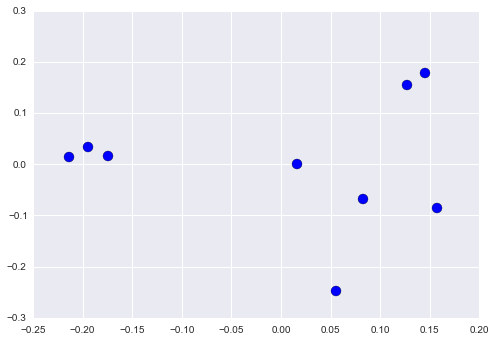

In [7]:
fig, ax1 = sns.plt.subplots()  
x1, x2 = X_bar[:,0], X_bar[:,1] # select coordinates via numpy indexing!
ax1.scatter(x1, x2, 100)

As you can see, we see a canvas appear with a number of dots. In our case, however, it will be more informative to remove the dots, and annotate them with the titles corresponding with each dot. We therefore first plot the position labels without any dot:

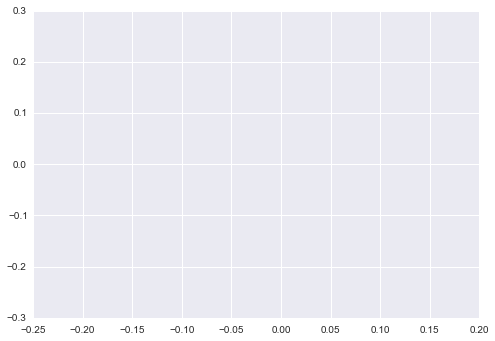

In [8]:
fig, ax1 = sns.plt.subplots()  
x1, x2 = X_bar[:,0], X_bar[:,1] # select coordinates via numpy indexing!
ax1.scatter(x1, x2, 100, edgecolors='none', facecolors='none')

And now we add the text labels:

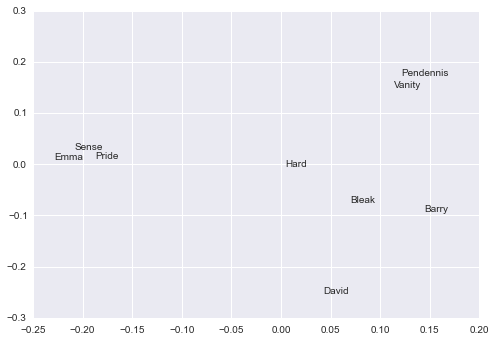

In [10]:
fig, ax1 = sns.plt.subplots()  
x1, x2 = X_bar[:,0], X_bar[:,1] # select coordinates via numpy indexing!
ax1.scatter(x1, x2, 100, edgecolors='none', facecolors='none')
for x, y, title in zip(x1, x2, titles):
    ax1.text(x, y, title, ha='center', va="center")

Here, we can see now how the horizontal spread captures the distinction between Austen's novels and the author author (which by convention represents the first components). The second, vertically displayed components, on the other hand, seems more sensitive to the difference between Thackeray and Dickens. PCA is definitely not the only technique which is nowadays used for dimension reduction, and a bunch of other techniques are equally useful for this problem of dimension reduction. One good example is Multi-Dimensional Scaling, which will result in a similarly reduced or condesed matrix. Luckily, because of sklearn's strict interfacing, we only have to change minor details in our code to re-run the procedure for MDS:

(9, 2)


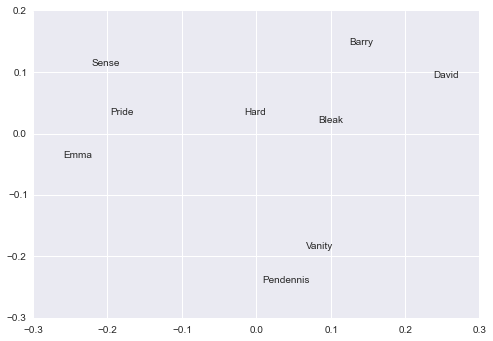

In [11]:
from sklearn.manifold import MDS
mds = MDS(n_components=2)
X_bar = mds.fit_transform(X)
print(X_bar.shape)
fig, ax1 = sns.plt.subplots()  
x1, x2 = X_bar[:,0], X_bar[:,1] # select coordinates via numpy indexing!
ax1.scatter(x1, x2, 100, edgecolors='none', facecolors='none')
for x, y, title in zip(x1, x2, titles):
    ax1.text(x, y, title, ha='center', va="center")

As you can see, a very similar structure arises from this analysis.

###Adding loadings

One particular advantage of such techniques that they do not need to funciton as black boxes, but they can actually inform us a lot about as to why this specific structure arises. In PCA, this can be achieved by overlaying our plot with the so-called 'loadings' for the original words: these will show us how specific words contribute to the oppositions created in the plots above. The loadings can be retrieved from the PCA object as follows:

In [12]:
pca = PCA(n_components=2)
X_bar = pca.fit_transform(X)
loadings = pca.components_
print(loadings.shape)

(2, 100)


As you can see, the `loadings_` property of the `pca` object returns a 2 x 100 matrix which holds for each of the 2 principal components a score for each word in our vocabulary of 100. These scores will us how important the contribution of specific words was, when it comes to the creation of the principal components. To be able to interact more intuitively with these loadings, we now take the transpose the matrix:

In [13]:
loadings = loadings.transpose()
print(loadings.shape)

(100, 2)


Let us now add these word loadings to our plots, and overlay our original graph with the word loadings in a lighter colour. To achieve this we actually need to add a second axis to the plot, because the word loadings have a scale that is different from the text's position. We can do that in a way that is precisely parallel to plotting the title labels:

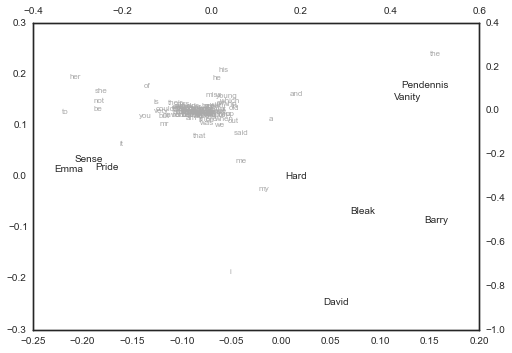

In [14]:
sns.set_style('white') # remove gridlines because of dual axes

# we repeat the previous bit:
fig, ax1 = sns.plt.subplots()  
x1, x2 = X_bar[:,0], X_bar[:,1] # select coordinates via numpy indexing!
ax1.scatter(x1, x2, 100, edgecolors='none', facecolors='none')
for x, y, title in zip(x1, x2, titles):
    ax1.text(x, y, title, ha='center', va="center")

ax2 = ax1.twinx().twiny()
l1, l2 = loadings[:,0], loadings[:,1]
ax2.scatter(l1, l2, 100, edgecolors='none',
            facecolors='none') # first empty plot!
for x, y, l in zip(l1, l2, words):
    ax2.text(x, y, l ,ha='center', va="center",
             size=8, color="darkgrey")

In this plot, the loadings now reveal why the PCA came up with this sort of clustering: appararently Jane Austen uses a of personal pronouns (_her_, _she_), whereas Thackeray is a fervent used of the article _the_.

### Some more eye candy

Our plot is starting to look nice. One additional feature we could add is some colouring. We could add this colour information on the basis of our author labels, and give the text of every author a distinct colour in the plot. This easy to achieve. We first define a color list, on the basis of the author labels: 

In [16]:
color_dict = {'Austen':'r',
              'Dickens':'b',
              'Thackeray': 'y'}
print(color_dict)

{'Thackeray': 'y', 'Austen': 'r', 'Dickens': 'b'}


We now add the relevant color when looping through the text labels at plotting time

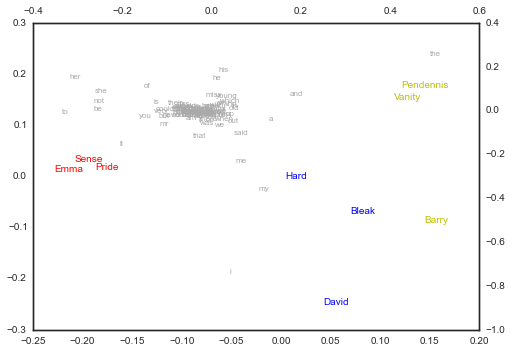

In [18]:
sns.set_style('white') # remove gridlines because of dual axes

# we repeat the previous bit:
fig, ax1 = sns.plt.subplots()  
x1, x2 = X_bar[:,0], X_bar[:,1] # select coordinates via numpy indexing!
ax1.scatter(x1, x2, 100, edgecolors='none', facecolors='none')
for x, y, title, author in zip(x1, x2, titles, authors):
    ax1.text(x, y, title, ha='center',
             va="center", color=color_dict[author])

# overlay the loadings:
ax2 = ax1.twinx().twiny()
l1, l2 = loadings[:,0], loadings[:,1]
ax2.scatter(l1, l2, 100, edgecolors='none',
            facecolors='none') # first empty plot!
for x, y, l in zip(l1, l2, words):
    ax2.text(x, y, l ,ha='center', va="center",
             size=8, color="darkgrey")

This surely offers a nice reading aid when inspecting such scatterplots. Another possibility would be run a clustering algorithm on top of the samples' position in the PC space. In this case, our analysis is even less 'supervised', and we will be less tempted to interpret specific distances as 'significant', on the basis of the author labels. 

Additionally, this setup allows us to demonstrate another set of unsupervised routines in sklearn, namely the type of clustering, which we already worked with in the previous chapter on scipy. Let us import some ('agglomerative') clustering functionality from `sklearn` as follows:

In [19]:
from sklearn.cluster import AgglomerativeClustering

Again, we first need to instantiate the clusters, before we can run it on our data. Note that we have the algorithm discern only the two most distinct clusters, using the `n_clusters` parameter. 

In [20]:
clust = AgglomerativeClustering(linkage='ward', n_clusters=2)
clust.fit(X_bar)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward',
            memory=Memory(cachedir=None), n_clusters=2, n_components=None,
            pooling_func=<function mean at 0x1074de950>)

After running the clustering algorithm, we can now access the cluster labels, indicating to which of the two clusters each inidividual text has been assigned:

In [21]:
cl_labels = clust.labels_
print(cl_labels)

[1 1 1 0 0 0 0 0 0]


Notice the underscore at the end of the `.label_` property. If you scroll up, you can see that the `.loadings_` property of the PCA object has it too. The fact that this property _ends_ with an underscore, is a convention which sklearn uses to indicate that this is a property, which only becomes available _after_ fitting the algorithm. We can now use these labels to obtain a more objective coloring of our samples:

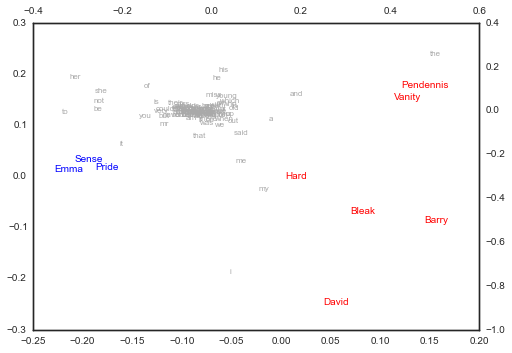

In [23]:
sns.set_style('white') # remove gridlines because of dual axes

clust_colors = ('r', 'b')

# we repeat the previous bit:
fig, ax1 = sns.plt.subplots()  
x1, x2 = X_bar[:,0], X_bar[:,1] # select coordinates via numpy indexing!
ax1.scatter(x1, x2, 100, edgecolors='none', facecolors='none')
for x, y, title, c_idx in zip(x1, x2, titles, cl_labels):
    ax1.text(x, y, title, ha='center',
             va="center", color=clust_colors[c_idx])

# overlay the loadings:
ax2 = ax1.twinx().twiny()
l1, l2 = loadings[:,0], loadings[:,1]
ax2.scatter(l1, l2, 100, edgecolors='none',
            facecolors='none') # first empty plot!
for x, y, l in zip(l1, l2, words):
    ax2.text(x, y, l ,ha='center', va="center",
             size=8, color="darkgrey")

### DIY
Adapt the code in the previous code blocks to yield 3 and 4 colors in the final graph, varying the number of clusters asked for. Instead of using Agglomerative Clustering, import the clusterer in `sklearn.cluster.KMeans`. Check out the documentation online: is the interface the same? Are the results similar?

-------------------------------------------